# Red Wine Quality Prediction Project

In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the dataset
wine_df = pd.read_csv("winequality-red.csv")
print("Successfully Imported Data!")
wine_df

Successfully Imported Data!


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


This dataset contains numerical data

In [11]:
wine_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [12]:
wine_df.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


# Starting the EDA

In [13]:
# Checking dimension of Dataset
wine_df.shape

(1599, 12)

This dataset contains 1599 rows and 12 columns out of which 11 are features and 1 is label(output)

In [14]:
#checking Clumns name
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [15]:
# Checking data type
wine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

 All the data columns have continuous data

In [16]:
# Checking for null values if any
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null values present in this dataset

In [17]:
#Checking detail information
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


This gives the detail information about dataset

In [18]:
#Checking description of dataset
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


- The Counts of all the columns are same means no missing values are present in the dataset
- In Free sulfur dioxide and total sulfur dioxide there is good difference in between 75% and max hense there are outliers present in the data

There are 6 quality ratings in the dataset for red wine.This is classification problem so convert quality column into binary


# Data Visualization

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


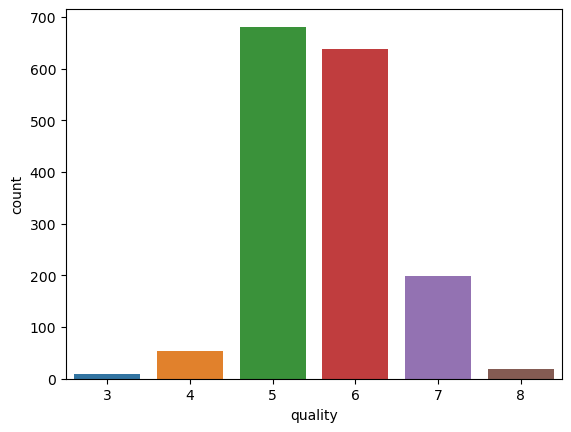

In [19]:
#Visualize by countplot
ax=sns.countplot(x='quality',data=wine_df)
print(wine_df['quality'].value_counts())

From the plot we can observe that Most of our quality scores are 5s and 6s

3.30    57
3.36    56
3.26    53
3.38    48
3.39    48
        ..
3.75     1
2.74     1
3.70     1
3.85     1
2.90     1
Name: pH, Length: 89, dtype: int64


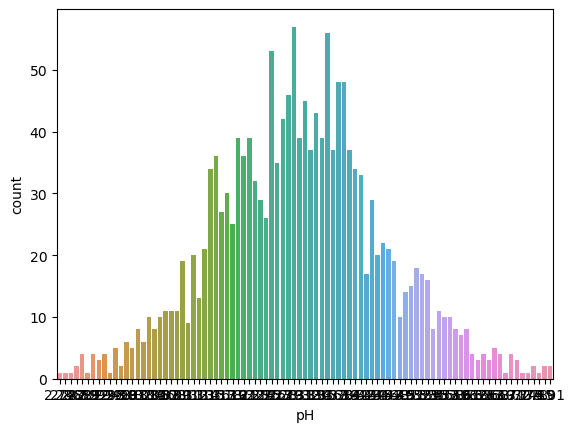

In [20]:
ax=sns.countplot(x='pH',data=wine_df)
print(wine_df['pH'].value_counts())

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


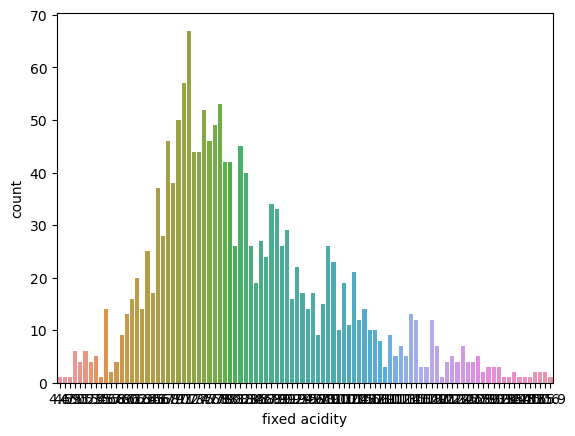

In [21]:
ax=sns.countplot(x='fixed acidity',data=wine_df)
print(wine_df['fixed acidity'].value_counts())

0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


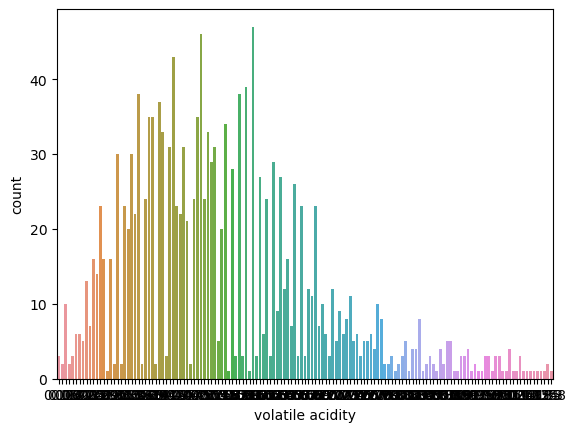

In [22]:
ax=sns.countplot(x='volatile acidity',data=wine_df)
print(wine_df['volatile acidity'].value_counts())

0.99720    36
0.99680    35
0.99760    35
0.99800    29
0.99620    28
           ..
0.99684     1
0.99764     1
0.99473     1
0.99320     1
0.99651     1
Name: density, Length: 436, dtype: int64


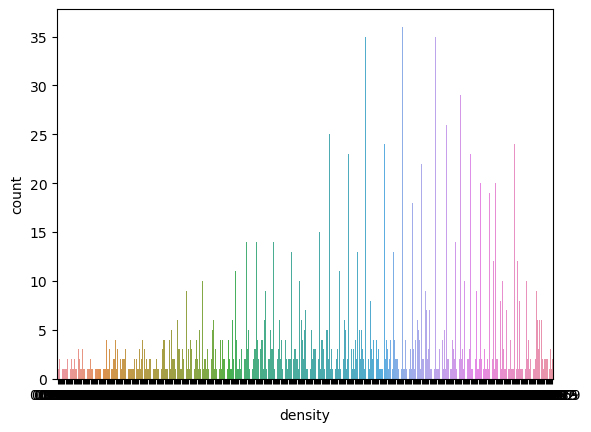

In [23]:
ax=sns.countplot(x='density',data=wine_df)
print(wine_df['density'].value_counts())

9.500000     139
9.400000     103
9.800000      78
9.200000      72
10.000000     67
            ... 
9.950000       1
9.233333       1
9.250000       1
9.050000       1
10.750000      1
Name: alcohol, Length: 65, dtype: int64


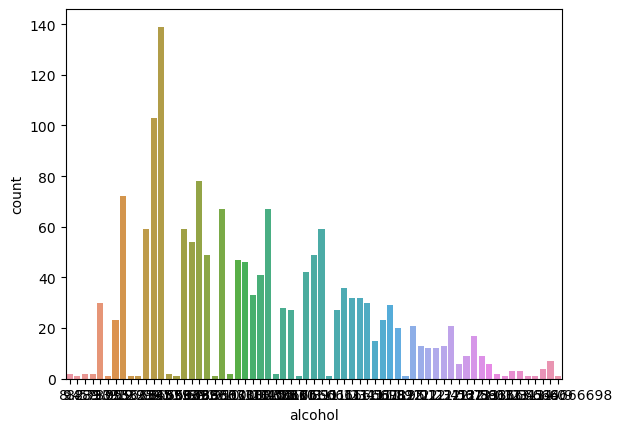

In [24]:
ax=sns.countplot(x='alcohol',data=wine_df)
print(wine_df['alcohol'].value_counts())

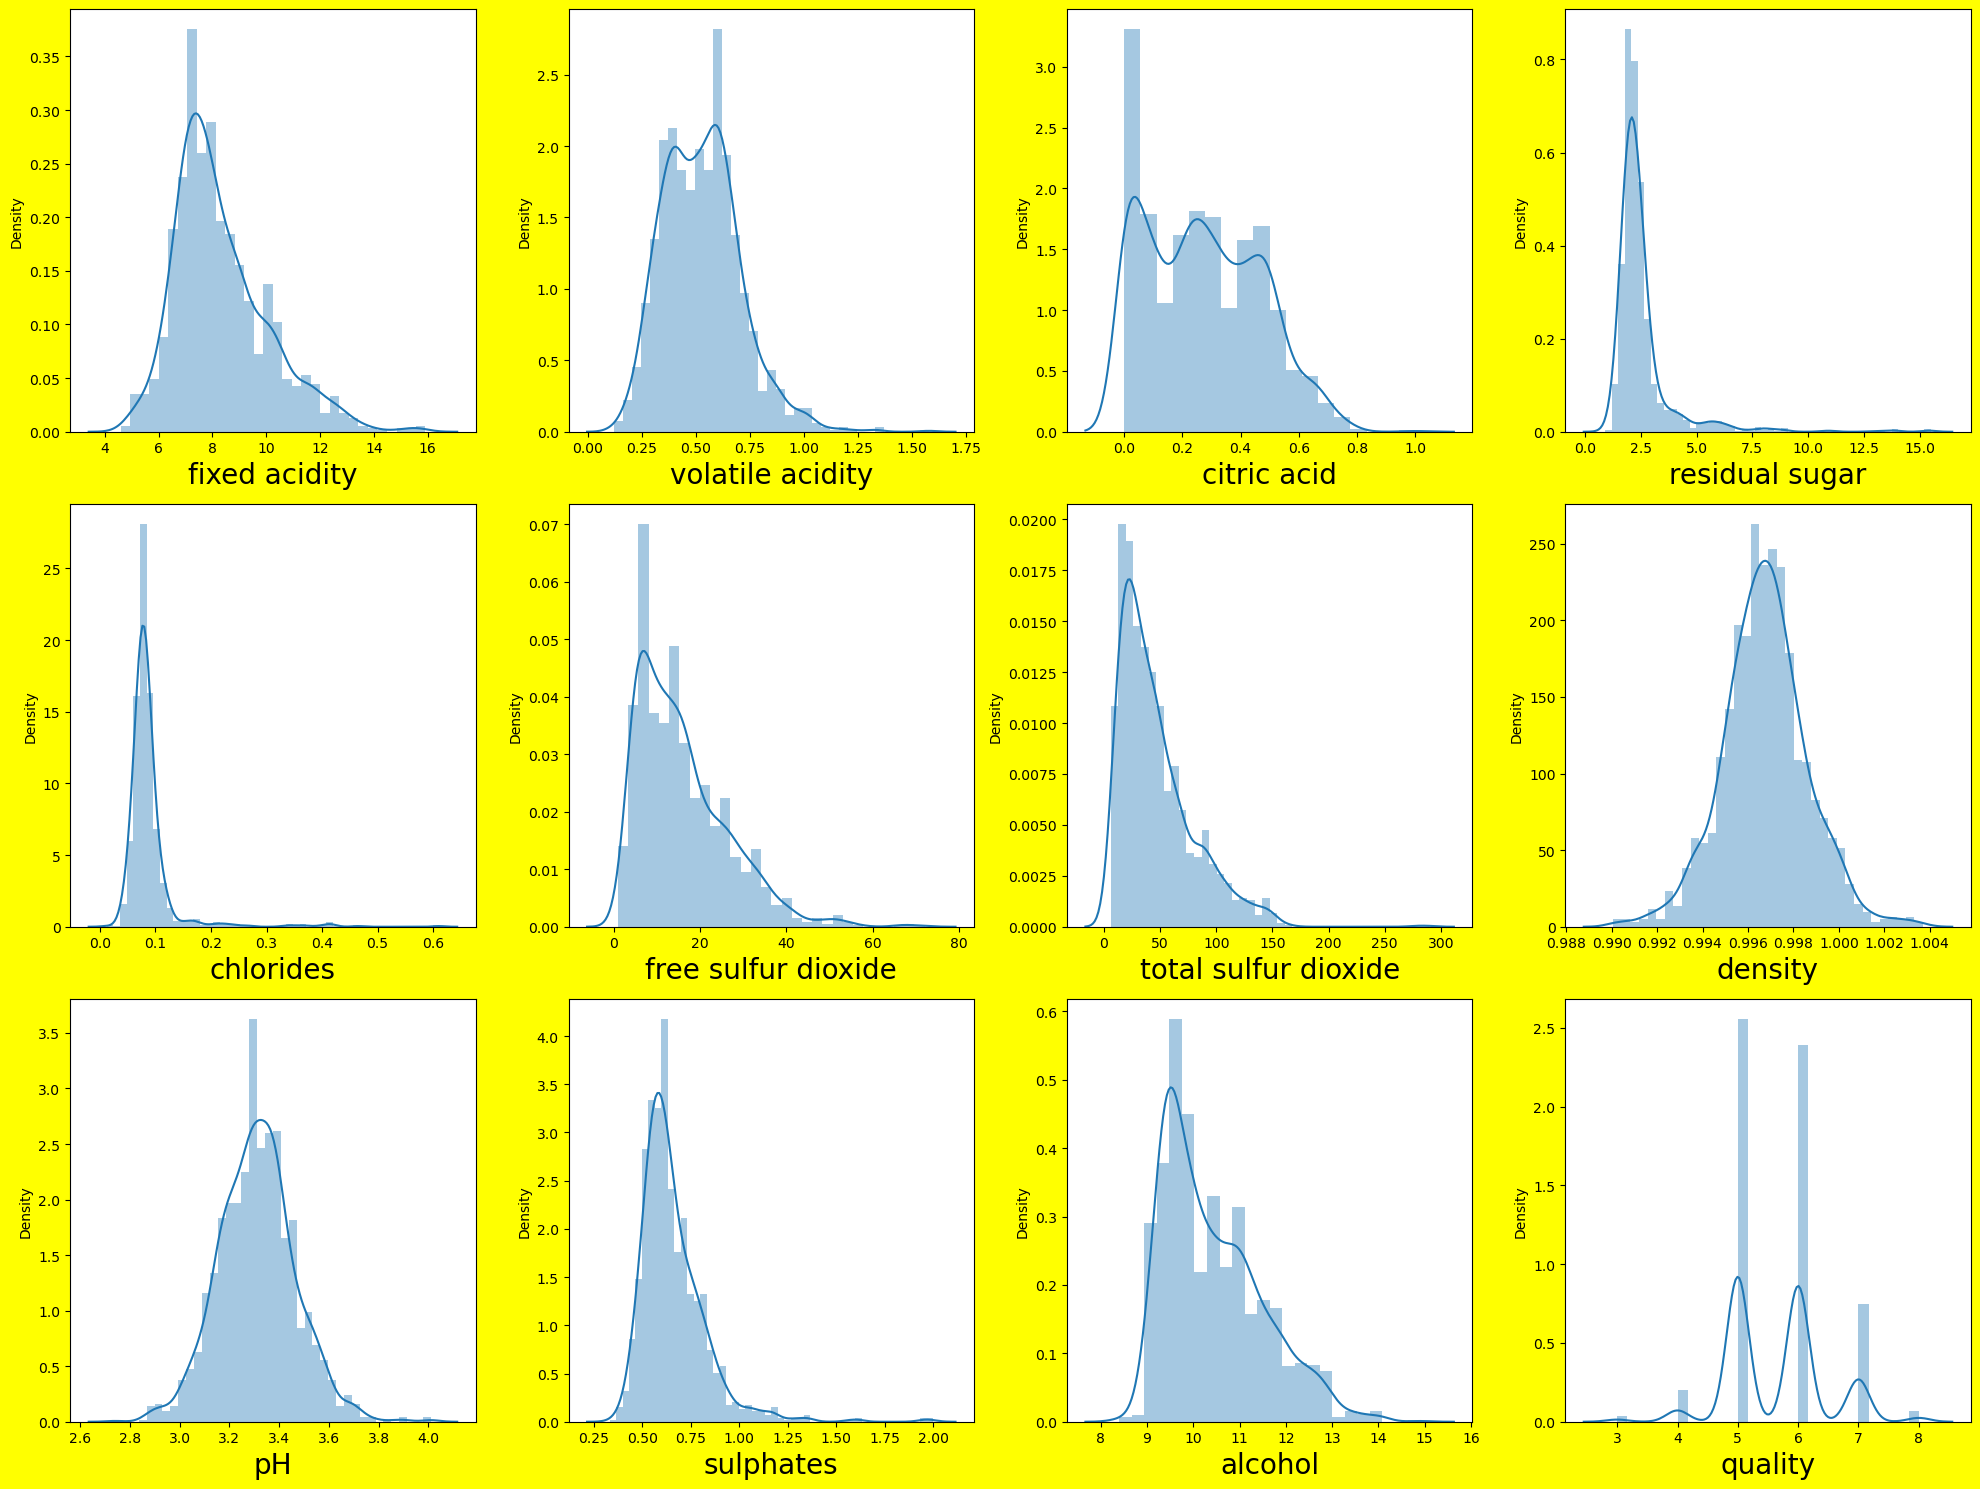

In [25]:
#Lets see how the data is distributed for every column

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


plt.figure(figsize =(20,15), facecolor = 'yellow')
plotnumber = 1

for column in wine_df:
    if plotnumber <=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(wine_df[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber +=1
plt.tight_layout()

From the above distribution plot, I noticed that the data almost looks mormaly distributed except Residual sugar,chlorides and sulphates,total sulfur dioxide.Looks like outliers are present in this columns.

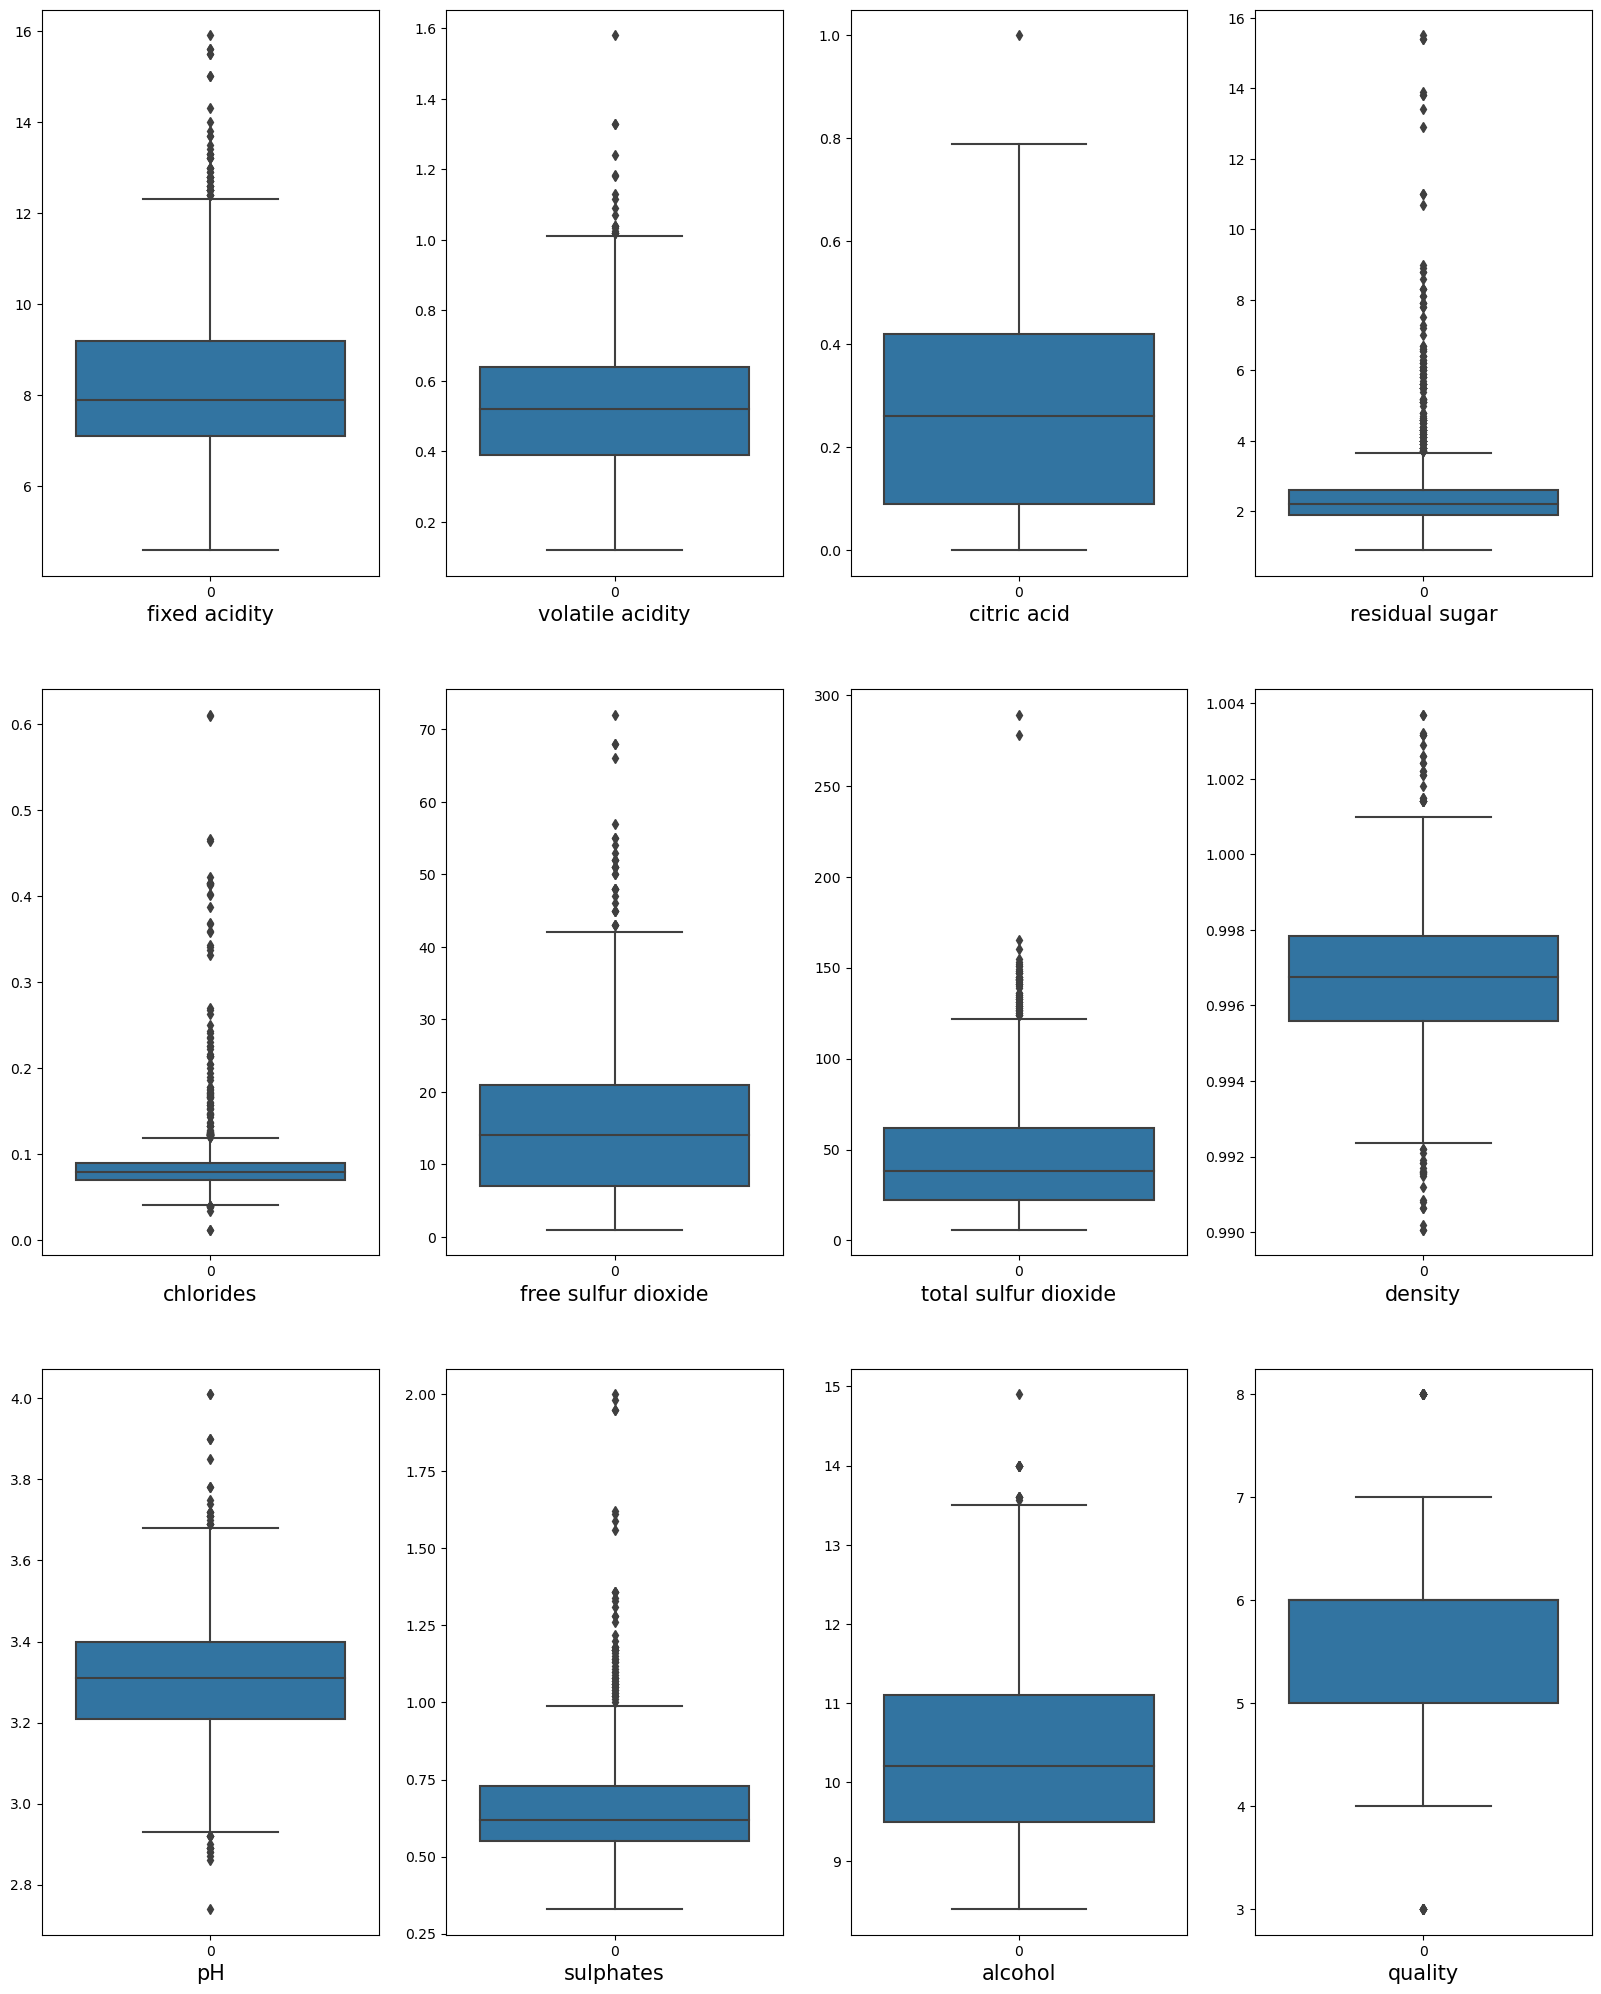

In [26]:
# Now visualize the data using boxplot for getting more idea abot outliers
plt.figure(figsize =(20,25))
graph = 1

for column in wine_df:
    if graph <=12: # as there are 9 columns in data
        plt.subplot(3,4,graph)
        ax=sns.boxplot(data=wine_df[column])
        plt.xlabel(column,fontsize = 15)
        
    graph +=1
plt.show()

From the boxplot, We noticed that,Outliers are present in Residual sugar,chlorides and sulphates,total sulfur dioxide columns. but as We cannot remove any data due to the small number of data we will move forward with the existing columns 

seems like Features and label are correlated but we need more proof to make sure they really corelated.so we will use other techniques to study the realtionship further

In [27]:
wine_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


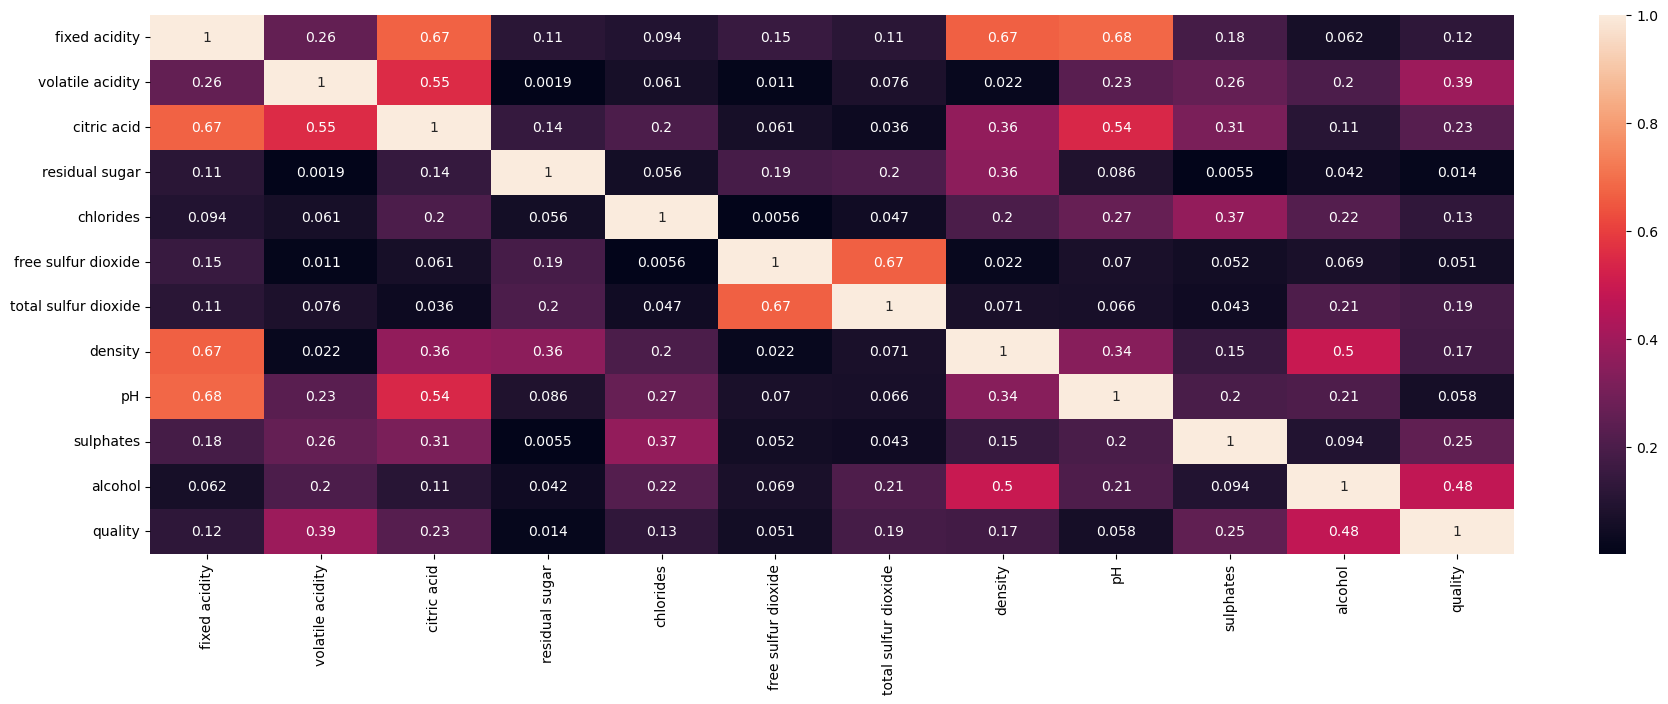

In [28]:
# Plot the heatmap
import matplotlib.pyplot as plt

df_corr=wine_df.corr().abs()
plt.figure(figsize=(22,7))
sns.heatmap(df_corr, annot=True)
plt.show()

The good thing is we can't see any multicollinearity among features. Generally features has multicollinearity if they have 90% correlationship.


In [30]:
#Checking the columns which are positively and negatively correlated with the quality column
df=wine_df
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


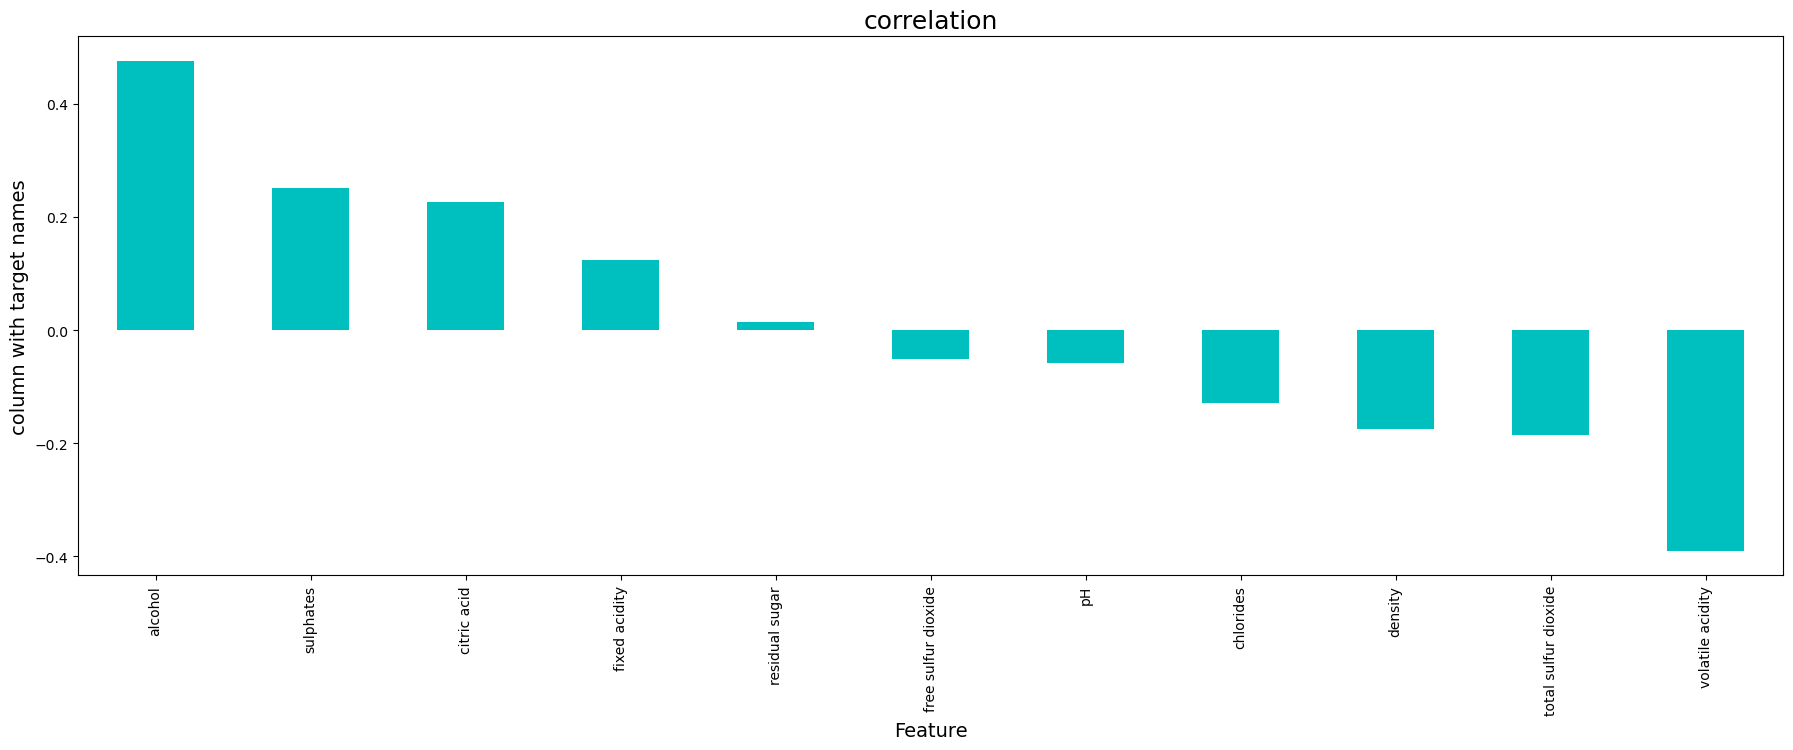

In [31]:
#Checking the columns which are positively and negatively correlated with the quality column

plt.figure(figsize=(22,7))
df.corr()['quality'].sort_values(ascending=False).drop(['quality']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

From the above study we see that :-

the correlation btw feature and lable is significat to remove any features and due to small size of data we will not remove any data

we also see the most correalation btw target and feature is alccohol content

we see that the ph and residual sugar practically having very less or no relationship with the target variable 

In [32]:
wine_df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [33]:
#convert quality column into binary 
wine_df['quality'] = wine_df.quality.apply(lambda x : '1' if x > 5 else '0')

In [34]:
#Total no. of unique values in Target Variable
wine_df['quality'].nunique()

2

In [35]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


# Separate the data into Features and lable

In [36]:
x= wine_df.drop(['quality'],axis=1)
y=wine_df['quality']

In [37]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [38]:
y

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: object

# Standardization of data

In [39]:
from sklearn.preprocessing import StandardScaler


In [40]:
scaler=StandardScaler()
x_scaled=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [41]:
x_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


In [42]:
#Checking multicollinearity among features with variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
vif=pd.DataFrame()
vif['Score']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['features']=x.columns
vif


,Score,features
0,7.767512,fixed acidity
1,1.789390,volatile acidity
2,3.128022,citric acid
3,1.702588,residual sugar
4,1.481932,chlorides
5,1.963019,free sulfur dioxide
6,2.186813,total sulfur dioxide
7,6.343760,density
8,3.329732,pH
9,1.429434,sulphates


-Here we can see that there is no multicollinearity among features as the vif score is under limit<=10.

# Model Building

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score

In [45]:
#Splitting Dataset
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=45)

In [46]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)

        print('=======================Train result======================')
        print(f'accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%')


    elif train==False:
        pred=clf.predict(x_test)

        print('=======================Test Result=======================')
        print(f'accuracy_score:{accuracy_score(y_test,pred)*100:.2f}%')
        print('\n\nClassification report\n',classification_report(y_test,pred,digits=2))

# Logistic Regression

In [79]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [80]:
metric_score(lr,x_train,x_test,y_train,y_test,train=True) #this is for training score
metric_score(lr,x_train,x_test,y_train,y_test,train=False)  ##this is for testing score


=======================Train result======================
accuracy score:74.08%
=======================Test Result=======================
accuracy_score:76.25%


Classification report
               precision    recall  f1-score   support

           0       0.75      0.74      0.74       224
           1       0.78      0.78      0.78       256

    accuracy                           0.76       480
   macro avg       0.76      0.76      0.76       480
weighted avg       0.76      0.76      0.76       480



A clear underfitting can be seen in the model as train score is 74.08% and test score is 76.25% only.


In [81]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr = lr.predict(x_test)
print('Accuracy', accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 76.25
[[166  58]
 [ 56 200]]
              precision    recall  f1-score   support

           0       0.75      0.74      0.74       224
           1       0.78      0.78      0.78       256

    accuracy                           0.76       480
   macro avg       0.76      0.76      0.76       480
weighted avg       0.76      0.76      0.76       480



We are getting very less accuracy with Logistic regression so lets use other algorithms

# Decision Tree Classifier

In [82]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)


DecisionTreeClassifier()

In [83]:
metric_score(dt,x_train,x_test,y_train,y_test,train=True) #this is for training score
metric_score(dt,x_train,x_test,y_train,y_test,train=False)  ##this is for testing score

=======================Train result======================
accuracy score:100.00%
=======================Test Result=======================
accuracy_score:77.29%


Classification report
               precision    recall  f1-score   support

           0       0.76      0.75      0.76       224
           1       0.79      0.79      0.79       256

    accuracy                           0.77       480
   macro avg       0.77      0.77      0.77       480
weighted avg       0.77      0.77      0.77       480



In [84]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print('Accuracy', accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,preddt))

Accuracy 76.45833333333333
[[166  58]
 [ 56 200]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       224
           1       0.77      0.80      0.78       256

    accuracy                           0.76       480
   macro avg       0.76      0.76      0.76       480
weighted avg       0.76      0.76      0.76       480



Accuracy increased to 75.s% approx , but still not much difference

# Random Forest Classifier

In [85]:
rf=RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print('Accuracy', accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predrf))


Accuracy 83.75
[[166  58]
 [ 56 200]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       224
           1       0.85      0.84      0.85       256

    accuracy                           0.84       480
   macro avg       0.84      0.84      0.84       480
weighted avg       0.84      0.84      0.84       480



In [86]:
metric_score(rf,x_train,x_test,y_train,y_test,train=True) #this is for training score
metric_score(rf,x_train,x_test,y_train,y_test,train=False)  ##this is for testing score


=======================Train result======================
accuracy score:100.00%
=======================Test Result=======================
accuracy_score:83.75%


Classification report
               precision    recall  f1-score   support

           0       0.82      0.83      0.83       224
           1       0.85      0.84      0.85       256

    accuracy                           0.84       480
   macro avg       0.84      0.84      0.84       480
weighted avg       0.84      0.84      0.84       480



we got a higher 83.75% accuracy , but lets try one more algorithm


# SVC

In [77]:
from sklearn.svm import SVC

svc= SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)

print('Test Accuracy', accuracy_score(y_test,predsvc)*100)

print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Test Accuracy 78.54166666666667
[[171  53]
 [ 50 206]]
              precision    recall  f1-score   support

           0       0.77      0.76      0.77       224
           1       0.80      0.80      0.80       256

    accuracy                           0.79       480
   macro avg       0.78      0.78      0.78       480
weighted avg       0.79      0.79      0.79       480



In [78]:
metric_score(svc,x_train,x_test,y_train,y_test,train=True) #this is for training score
metric_score(svc,x_train,x_test,y_train,y_test,train=False)  ##this is for testing score


=======================Train result======================
accuracy score:79.00%
=======================Test Result=======================
accuracy_score:78.54%


Classification report
               precision    recall  f1-score   support

           0       0.77      0.76      0.77       224
           1       0.80      0.80      0.80       256

    accuracy                           0.79       480
   macro avg       0.78      0.78      0.78       480
weighted avg       0.79      0.79      0.79       480



WE again got a lesser score on SVC so we can assume that Random forest classifier is the best algorithm for quality of red wine prediction

# Cross Validation

In [88]:
# cv score for Decision Tree Classifier
cvdt=cross_val_score(dt,x,y,cv=5).mean()
print('CV score for Decision Tree Classifier:',cvdt)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,preddt)-cvdt)

CV score  for Decision Tree Classifier: 0.6435031347962382
And Difference between CV and accuracy_score= 0.12108019853709506


In [89]:
# cv score for Random Forest Classifier
cvrf=cross_val_score(rf,x,y,cv=5).mean()
print('CV score for Random Forest Classifier:',cvrf)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predrf)-cvrf)

CV score  for Decision Tree Classifier: 0.7141947492163009
And Difference between CV and accuracy_score= 0.12330525078369914


In [90]:
# cv score for svc
cvsvc=cross_val_score(svc,x,y,cv=5).mean()
print('CV score for svc:',cvsvc)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predsvc)-cvsvc)

CV score for svc: 0.6309913793103449
And Difference between CV and accuracy_score= 0.15442528735632177


From the observation of accuracy and cross validation score and their difference we can predict that Random Forest Classifier is the best model

# Hyper parameter Tuning

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()

#Creating parameters to pass in GridSearchCV

parameters = {'max_features' :['auto','sqrt','log2'],
             'max_depth' :[4,5,6,7,8],
              'criterion' : ['gini', 'entropy'],
              'n_estimators' : [100,200,300,400,500]
             }

GCV = GridSearchCV(estimator =rf,param_grid=parameters,cv=7,scoring='accuracy')
GCV.fit(x_train,y_train) #fitting data into the model
GCV.best_params_ #printing the best parameters found by the GridSearchCV

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

In [93]:
GCV_pred=GCV.best_estimator_.predict(x_test) #predicting with the best parameters
accuracy_score(y_test,GCV_pred) #Checking Final Accuracy

0.8458333333333333

Our best model with best parameters has given an excellent accuracy of 84.5%

# ROC AUC Plot

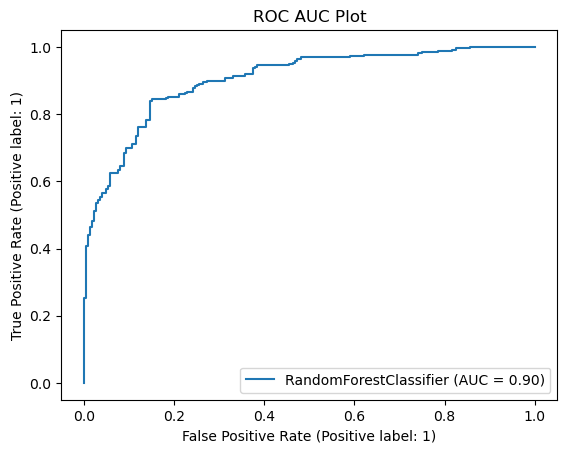

In [94]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()


# Saving the best classification model

In [98]:
import pickle
filename = 'Wine_quality.pkl'
pickle.dump(GCV,open(filename,'wb'))

In [100]:
loaded_model = pickle.load(open('Wine_quality.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

84.58333333333333


In [102]:
### Predicting the Output
original = np.array(y_test)
predicted = np.array(loaded_model.predict(x_test))
df_new = pd.DataFrame({"Original":original,"Predicted":predicted},index= range(len(original)))
df_new.sample(20)

,Original,Predicted
224,0,1
42,0,0
151,0,0
109,1,1
58,0,0
370,0,0
373,1,1
50,1,1
306,1,1
169,1,1


In [105]:
auc_score=roc_auc_score(y_test,predicted)
print(auc_score)


0.8459821428571428


# Conclusion:--
# We can see our model has predicted same ouputs in almost cases.
# Here we can see that the area under the curve is 84.5 which is a very good score
# The prediction results indicated that Random Forest Classifier model achieved excellent prediction accuracy.
